<a href="https://colab.research.google.com/github/cincysam6/BengalR/blob/main/Bengals_Analysis_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


install.packages("nflreadr")
install.packages("nflfastR")
install.packages("ggthemes")

library(ggthemes)
library(nflreadr)
library(nflfastR)
library(dplyr)
library(tidyverse)
library(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘globals’, ‘listenv’, ‘parallelly’, ‘snakecase’, ‘fastrmodels’, ‘furrr’, ‘future’, ‘janitor’, ‘progressr’, ‘xgboost’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘nflfastR’


The following objects are masked from ‘package:nflreadr’:

    load_pbp, load_player_stats



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ stringr 1.4.0
✔ tidyr   1.2.0 

In [2]:
install.packages("gtExtras")
install.packages("gt")
library(gtExtras)
library(gt)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘checkmate’, ‘prismatic’, ‘fontawesome’, ‘gt’, ‘paletteer’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
teams <- load_teams()
depth_charts <- load_depth_charts(seasons=2021)
current_ff_rankings<-load_ff_rankings()
participation_data<-load_participation(seasons=2021)
injuries<-load_injuries(seasons=2021)
pfr_adv_stats<-load_pfr_advstats(seasons=2021)
rosters<-load_rosters(seasons=2021)
players<-load_players()
player_stats<-load_player_stats(seasons=2021)
schedules_2021_pres <-load_schedules(2021:2022)
pbp_data<-load_pbp(seasons=2021)
ngs_data<-load_nextgen_stats(seasons=2021)




In [4]:
str(ngs_data)
str(player_stats)
str(pfr_adv_stats)
str(current_ff_rankings)
str(depth_charts)

nflverse_data [608 × 29] (S3: nflverse_data/tbl_df/tbl/data.table/data.frame)
 $ season                                 : int [1:608] 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 ...
 $ season_type                            : chr [1:608] "REG" "REG" "REG" "REG" ...
 $ week                                   : int [1:608] 0 0 0 0 0 0 0 0 0 0 ...
 $ player_display_name                    : chr [1:608] "Taylor Heinicke" "Josh Allen" "Kyler Murray" "Justin Fields" ...
 $ player_position                        : chr [1:608] "QB" "QB" "QB" "QB" ...
 $ team_abbr                              : chr [1:608] "WAS" "BUF" NA "CHI" ...
 $ avg_time_to_throw                      : num [1:608] 2.97 2.9 2.77 2.91 2.91 ...
 $ avg_completed_air_yards                : num [1:608] 5.15 6.46 5.76 7.11 5.65 ...
 $ avg_intended_air_yards                 : num [1:608] 7.93 8.62 7.89 9.52 8.07 ...
 $ avg_air_yards_differential             : num [1:608] -2.77 -2.16 -2.13 -2.41 -2.42 ...
 $ aggressiveness    

In [5]:


participation_data<-participation_data%>%separate(offense_players, into=c("off_plyer_1","off_plyer_2","off_plyer_3","off_plyer_4","off_plyer_5","off_plyer_6","off_plyer_7","off_plyer_8","off_plyer_9","off_plyer_10","off_plyer_11"),sep = ";")%>%separate(defense_players, into=c("def_plyer_1","def_plyer_2","def_plyer_3","def_plyer_4","def_plyer_5","def_plyer_6","def_plyer_7","def_plyer_8","def_plyer_9","def_plyer_10","def_plyer_11"),sep = ";")

head(participation_data)

Warning message:
“Expected 11 pieces. Additional pieces discarded in 8 rows [733, 1247, 3749, 6581, 10846, 14605, 28809, 29599].”
Warning message:
“Expected 11 pieces. Missing pieces filled with `NA` in 4392 rows [1, 43, 71, 88, 97, 102, 145, 176, 178, 181, 184, 191, 201, 203, 204, 248, 273, 285, 295, 297, ...].”
Warning message:
“Expected 11 pieces. Additional pieces discarded in 37 rows [214, 6683, 8431, 9312, 9438, 11151, 13063, 13860, 14926, 16469, 20166, 20190, 21064, 21686, 22265, 24104, 24545, 24657, 25070, 25314, ...].”
Warning message:
“Expected 11 pieces. Missing pieces filled with `NA` in 4546 rows [1, 43, 71, 85, 88, 97, 102, 145, 176, 178, 181, 184, 191, 201, 203, 204, 248, 273, 285, 295, ...].”


old_game_id,play_id,possession_team,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,off_plyer_1,off_plyer_2,⋯,def_plyer_3,def_plyer_4,def_plyer_5,def_plyer_6,def_plyer_7,def_plyer_8,def_plyer_9,def_plyer_10,def_plyer_11,n_defense
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
2021090900,1,,NA,NA,NA,NA,NA,,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
2021090900,40,DAL,NA,NA,NA,NA,NA,00-0033083,00-0033512,⋯,00-0034515,00-0032637,00-0030456,00-0035254,00-0036672,00-0030382,00-0036427,00-0031016,00-0033006,11
2021090900,55,TB,SHOTGUN,"1 RB, 1 TE, 3 WR",7,"4 DL, 2 LB, 5 DB",NA,00-0033921,00-0032243,⋯,00-0033512,00-0032197,00-0033928,00-0032382,00-0036361,00-0031411,00-0033047,00-0033563,00-0035301,11
2021090900,76,TB,SINGLEBACK,"1 RB, 2 TE, 2 WR",7,"4 DL, 2 LB, 5 DB",NA,00-0033921,00-0032243,⋯,00-0032197,00-0034674,00-0036361,00-0032454,00-0031411,00-0033047,00-0033563,00-0033052,00-0035301,11
2021090900,97,TB,SHOTGUN,"1 RB, 1 TE, 3 WR",6,"4 DL, 2 LB, 5 DB",5,00-0033921,00-0032243,⋯,00-0033512,00-0032197,00-0033928,00-0032382,00-0036361,00-0031411,00-0033047,00-0033563,00-0035301,11
2021090900,119,TB,NA,NA,NA,NA,NA,00-0036643,00-0033595,⋯,00-0034418,00-0036882,00-0036646,00-0034373,00-0036379,00-0032454,00-0031357,00-0036986,00-0033917,11


In [6]:
str(pbp_data)

nflverse_data [50,712 × 372] (S3: nflverse_data/tbl_df/tbl/data.table/data.frame)
 $ play_id                             : num [1:50712] 1 40 55 76 100 122 152 181 218 253 ...
 $ game_id                             : chr [1:50712] "2021_01_ARI_TEN" "2021_01_ARI_TEN" "2021_01_ARI_TEN" "2021_01_ARI_TEN" ...
 $ old_game_id                         : chr [1:50712] "2021091207" "2021091207" "2021091207" "2021091207" ...
 $ home_team                           : chr [1:50712] "TEN" "TEN" "TEN" "TEN" ...
 $ away_team                           : chr [1:50712] "ARI" "ARI" "ARI" "ARI" ...
 $ season_type                         : chr [1:50712] "REG" "REG" "REG" "REG" ...
 $ week                                : int [1:50712] 1 1 1 1 1 1 1 1 1 1 ...
 $ posteam                             : chr [1:50712] NA "TEN" "TEN" "TEN" ...
 $ posteam_type                        : chr [1:50712] NA "home" "home" "home" ...
 $ defteam                             : chr [1:50712] NA "ARI" "ARI" "ARI" ...
 $ side_of_

In [7]:
joined_data<-participation_data%>%left_join(pbp_data,by=c("old_game_id"="old_game_id","play_id"="play_id"))

bengals_wk_1<-joined_data%>%filter(home_team == "CIN"|away_team == "CIN")

str(bengals_wk_1)

tot_plays<-bengals_wk_1%>%filter(possession_team=="CIN" & (play_type == "run"|play_type=="pass"))%>%select(game_id,possession_team)%>%group_by(game_id)%>%mutate(play_count = n())%>%distinct()
tot_plays


bengals_wk_1%>%select(play_type)%>%distinct()

tibble [3,592 × 402] (S3: tbl_df/tbl/data.frame)
 $ old_game_id                         : chr [1:3592] "2021091203" "2021091203" "2021091203" "2021091203" ...
 $ play_id                             : num [1:3592] 1 40 55 78 102 125 149 173 194 223 ...
 $ possession_team                     : chr [1:3592] "" "CIN" "MIN" "MIN" ...
 $ offense_formation                   : chr [1:3592] NA NA NA "I_FORM" ...
 $ offense_personnel                   : chr [1:3592] NA NA "2 RB, 0 TE, 3 WR" "2 RB, 0 TE, 3 WR" ...
 $ defenders_in_box                    : int [1:3592] NA NA NA 7 NA 7 5 7 NA 7 ...
 $ defense_personnel                   : chr [1:3592] NA NA "4 DL, 2 LB, 5 DB" "4 DL, 2 LB, 5 DB" ...
 $ number_of_pass_rushers              : int [1:3592] NA NA NA 4 NA 5 4 NA NA NA ...
 $ off_plyer_1                         : chr [1:3592] "" "00-0031181" "00-0032918" "00-0032918" ...
 $ off_plyer_2                         : chr [1:3592] NA "00-0035771" "00-0036345" "00-0029604" ...
 $ off_plyer_3       

game_id,possession_team,play_count
<chr>,<chr>,<int>
2021_01_MIN_CIN,CIN,67
2021_02_CIN_CHI,CIN,55
2021_03_CIN_PIT,CIN,39
2021_04_JAX_CIN,CIN,55
2021_05_GB_CIN,CIN,66
2021_06_CIN_DET,CIN,65
2021_07_CIN_BAL,CIN,62
2021_08_CIN_NYJ,CIN,53
2021_09_CLE_CIN,CIN,71


play_type
<chr>
NA
kickoff
no_play
pass
run
punt
extra_point
field_goal
qb_spike


In [8]:
df<-bengals_wk_1%>%filter(possession_team=="CIN" & (play_type == "run"|play_type=="pass"))%>%select(
game_id,
off_plyer_1,
off_plyer_2,
off_plyer_3,
off_plyer_4,
off_plyer_5,
off_plyer_6,
off_plyer_7,
off_plyer_8,
off_plyer_9,
off_plyer_10,
off_plyer_11,
play_id,
)%>%
pivot_longer(
    cols = starts_with("off_plyer"),
    names_to = "offensive_player",
    values_to = "player_id",
    values_drop_na = TRUE
  )

df<-df%>%select(game_id,player_id)%>%group_by(game_id,player_id)%>%mutate(number_of_plays = n())%>%arrange(desc(number_of_plays))%>%distinct()%>%left_join(rosters,by=c("player_id"="gsis_id"))

df_final<-df%>%select(number_of_plays,full_name,jersey_number,position,depth_chart_position,headshot_url)%>%filter(position == "OL" | position == "QB" | position == "WR" | position == "RB" | position == " TE")


Adding missing grouping variables: `game_id`, `player_id`


In [9]:
install.packages("scales")
library(scales)
player_usage<-df_final%>%arrange(full_name,game_id)%>%left_join(tot_plays,by=c("game_id"="game_id"))%>%distinct()%>%mutate(pct_of_off_plays = (number_of_plays/play_count),label = percent(pct_of_off_plays %>% round(2)))


player_usage%>%head(5)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




game_id,player_id,number_of_plays,full_name,jersey_number,position,depth_chart_position,headshot_url,possession_team,play_count,pct_of_off_plays,label
<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
2021_01_MIN_CIN,00-0034686,8,Auden Tate,19,WR,WR,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/kriiu42m14not0pusw1a",CIN,67,0.11940299,12%
2021_02_CIN_CHI,00-0034686,5,Auden Tate,19,WR,WR,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/kriiu42m14not0pusw1a",CIN,55,0.09090909,9%
2021_03_CIN_PIT,00-0034686,23,Auden Tate,19,WR,WR,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/kriiu42m14not0pusw1a",CIN,39,0.58974359,59%
2021_04_JAX_CIN,00-0034686,18,Auden Tate,19,WR,WR,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/kriiu42m14not0pusw1a",CIN,55,0.32727273,33%
2021_05_GB_CIN,00-0034686,13,Auden Tate,19,WR,WR,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/kriiu42m14not0pusw1a",CIN,66,0.19696970,20%


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



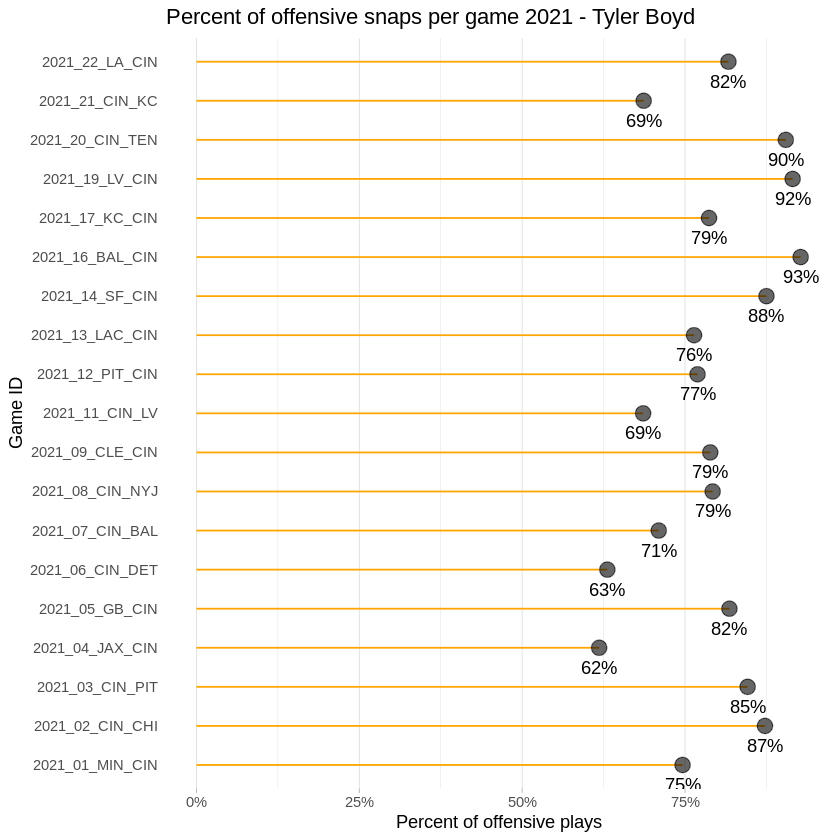

In [10]:
t_boyd<-player_usage%>%filter(player_id == "00-0033009")

#ggplot(t_boyd,aes(x=game_id,y=pct_of_off_plays)) + geom_bar(stat = "identity") + coord_flip ()


# Horizontal version
ggplot(t_boyd, aes(x=game_id, y=pct_of_off_plays)) +
  geom_segment( aes(x=game_id, xend=game_id, y=0, yend=pct_of_off_plays), color="orange") +
  geom_point( color="black", size=4, alpha=0.6) +
  theme_light() +
  coord_flip() +
  theme(
    panel.grid.major.y = element_blank(),
    panel.border = element_blank(),
    axis.ticks.y = element_blank()
  ) + ylim(0,1.1) +   geom_text(label = t_boyd$label,vjust=2) + ggtitle("Percent of offensive snaps per game 2021 - Tyler Boyd") + scale_y_continuous(labels = scales::percent) + labs(y="Percent of offensive plays",x="Game ID")




# Analysis of personnel by down


Warning message:
“The labeller API has been updated. Labellers taking `variable` and `value` arguments are now deprecated. See labellers documentation.”


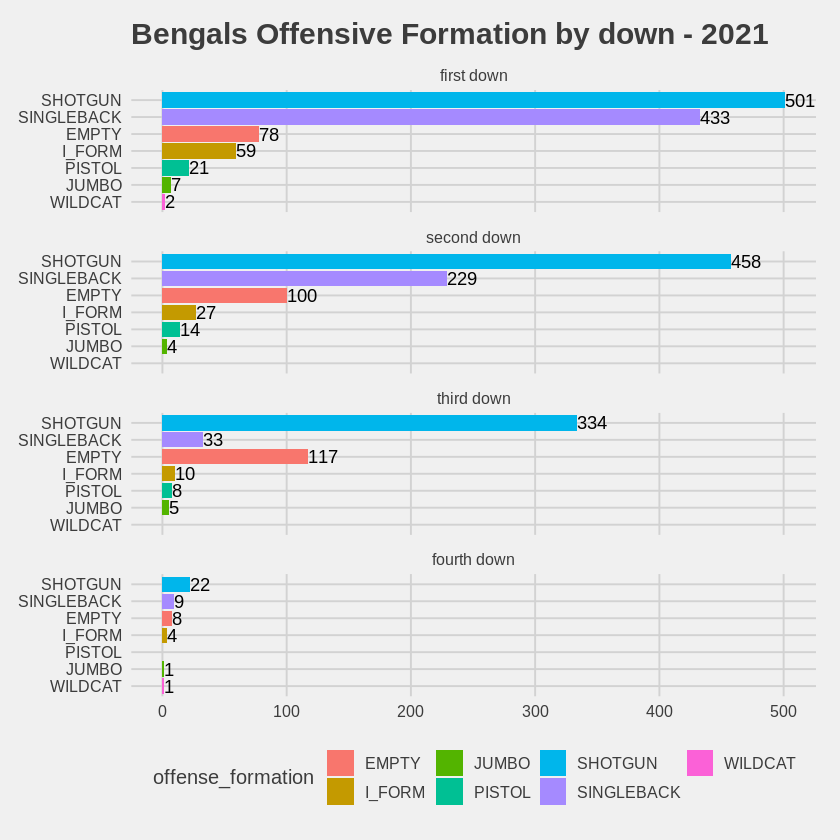

In [62]:
bengals_2021_data<-bengals_wk_1

personnel_by_down<-bengals_2021_data%>%
filter((play_type =="pass"|play_type=="run") & down != 'NA' &offense_formation != "NA")%>%
select(offense_formation,down)%>%group_by(offense_formation,down)%>%
mutate(n_plays = n())%>%
arrange(desc(n_plays))%>%distinct()

variable_names <- list(
 "1" = "first down",
 "2" = "second down",
 "3" = "third down",
 "4" = "fourth down" 
)

variable_labeller <- function(variable,value){
  return(variable_names[value])
}

### formation usage by down
ggplot(personnel_by_down, aes(x=reorder(offense_formation,n_plays), y=n_plays, fill=offense_formation))+
  geom_bar(stat='identity')+geom_text(label = personnel_by_down$n_plays, hjust = 0) +
  facet_wrap(~down,ncol = 1,labeller=variable_labeller) + coord_flip() + ggtitle("Bengals Offensive Formation by down - 2021") + theme_fivethirtyeight() + ylab("play count")


In [57]:
personnel_by_down

offense_formation,down,n_plays
<chr>,<dbl>,<int>
SHOTGUN,1,501
SHOTGUN,2,458
SINGLEBACK,1,433
SHOTGUN,3,334
SINGLEBACK,2,229
EMPTY,3,117
EMPTY,2,100
EMPTY,1,78
I_FORM,1,59




```
# This is formatted as code
```

# Quick Chris Evans analysis

I want to see how the bengals utilized Chris Evans in 2021. I need to find all bengals plays in which chris evans was utilized

In [11]:
chris_evans_data<-joined_data%>%filter(home_team=="CIN"|away_team=="CIN") %>%filter(off_plyer_1 == "00-0036857"|
off_plyer_2 == "00-0036857"|
off_plyer_3 == "00-0036857"|
off_plyer_4 == "00-0036857"|
off_plyer_5 == "00-0036857"|
off_plyer_6 == "00-0036857"|
off_plyer_7 == "00-0036857"|
off_plyer_8 == "00-0036857"|
off_plyer_9 == "00-0036857"|
off_plyer_10 == "00-0036857"|
off_plyer_11 == "00-0036857")

In [12]:
pt_dt<-chris_evans_data%>%filter((play_type == "pass" | play_type == "run") & offense_personnel != "NA")%>%group_by(offense_personnel,play_type)%>%mutate(play_count = n())%>%select(offense_personnel,play_type,play_count)%>%distinct()%>%arrange(offense_personnel,play_type)

pt_dt%>%head()


offense_personnel,play_type,play_count
<chr>,<chr>,<int>
"1 RB, 0 TE, 4 WR",run,1
"1 RB, 1 TE, 3 WR",pass,66
"1 RB, 1 TE, 3 WR",run,17
"1 RB, 2 TE, 2 WR",pass,5
"1 RB, 2 TE, 2 WR",run,4
"1 RB, 3 TE, 1 WR",run,1


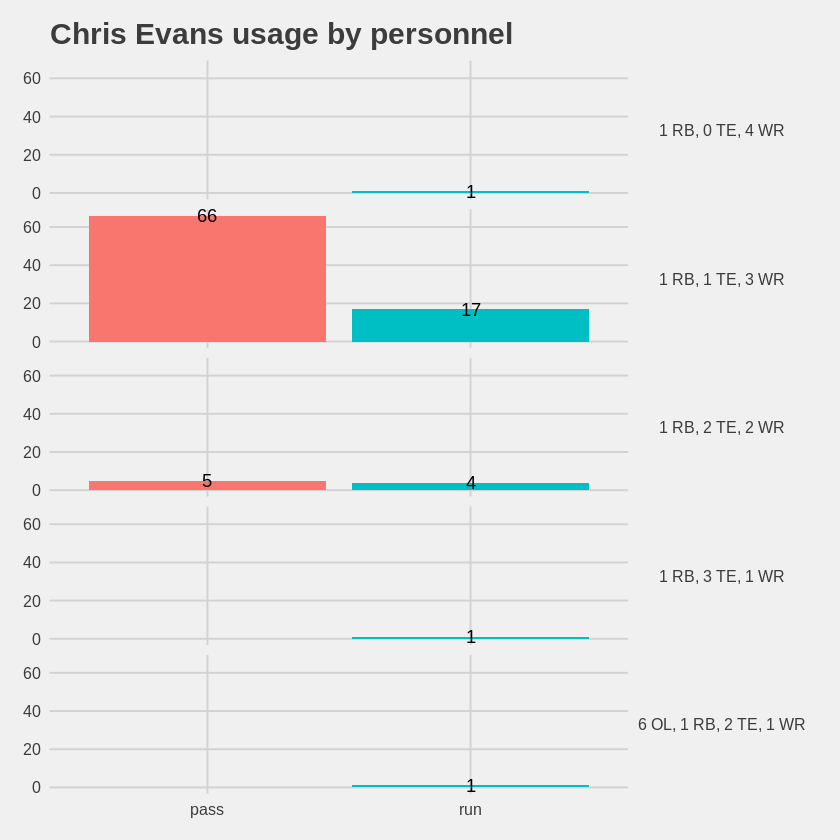

In [14]:



ggplot(pt_dt, aes(x=play_type, y=play_count, fill = play_type, label=play_count))+
geom_bar(stat='identity')+
facet_wrap(as.factor(pt_dt$offense_personnel), strip.position = "right",ncol=1) +
 theme_fivethirtyeight() +
 theme(strip.text.y = element_text(angle = 0),legend.position = "none") +
 ggtitle("Chris Evans usage by personnel")+
xlab("Play Type") + 
ylab("Total Snap Count") +
geom_text(aes(label = play_count), colour = "black")

In [15]:
chris_evans_data%>%head()


old_game_id,play_id,possession_team,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,off_plyer_1,off_plyer_2,⋯,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2021091901,665,CIN,NA,NA,NA,NA,NA,00-0027103,00-0036298,⋯,0,1,0.3006126,NA,NA,NA,NA,NA,NA,NA
2021091901,1551,CIN,SHOTGUN,"1 RB, 1 TE, 3 WR",5,"1 DL, 4 LB, 6 DB",3,00-0032134,00-0032043,⋯,1,1,1.9122600,0.2655294,4.532505,2,0.9945760,0.96777362,0.9422976,5.770242
2021091901,1693,CIN,NA,NA,NA,NA,NA,00-0027103,00-0036298,⋯,0,1,-0.3831434,NA,NA,NA,NA,NA,NA,NA
2021091901,2281,CIN,SHOTGUN,"1 RB, 1 TE, 3 WR",4,"2 DL, 3 LB, 6 DB",4,00-0032134,00-0032043,⋯,0,1,0.3111240,0.7542238,5.729763,4,0.1914996,0.07179989,0.9677591,3.224087
2021092607,279,CIN,EMPTY,"1 RB, 1 TE, 3 WR",5,"2 DL, 3 LB, 6 DB",4,00-0036865,00-0032134,⋯,0,1,-0.2147304,0.6965751,7.828767,6,0.1374442,0.07130587,0.8784213,12.157869
2021092607,303,CIN,NA,NA,NA,NA,NA,00-0027103,00-0036298,⋯,1,1,-0.3796378,NA,NA,NA,NA,NA,NA,NA
